## _1-Framing the Problem_
### _The purpose of this report is to train a univariate linear regression model and examine the relationship between median home value and each independent variable: median income, population, and number of households. Our goal is to find out how these independent variables affect the average house value and perhaps gain insights to make predictions or better understand the housing market..The purpose of this report is to train a univariate linear regression model and examine the relationship between median home value and each independent variable: median income, population, and number of households. Our goal is to find out how these independent variables affect the average house value and perhaps gain insights to make predictions or better understand the housing market._

## _2-Getting the Data_

In [1]:
import pandas as pd
data = pd.read_csv('data/housing.csv')


## _3-EDA_

### (1) Explore statistics

In [2]:
data.describe()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### (2)  Range of the data

In [3]:
X_income = data[['median_income']]
X_population = data[['population']]
X_households = data[['households']]
y = data['median_house_value']

# Check for missing values
print(data.isnull().sum())

# Check the data types and statistics
print(data.dtypes)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


### (3) Seaborn scatter plots

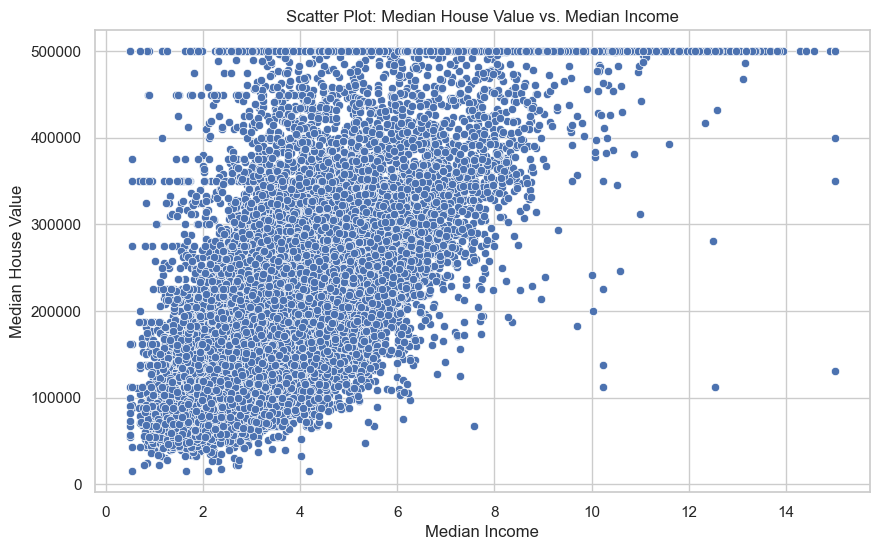

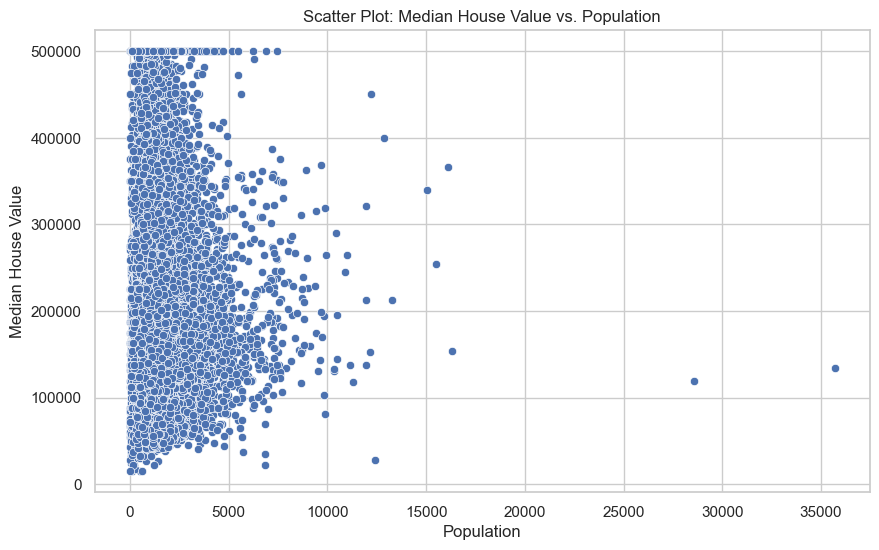

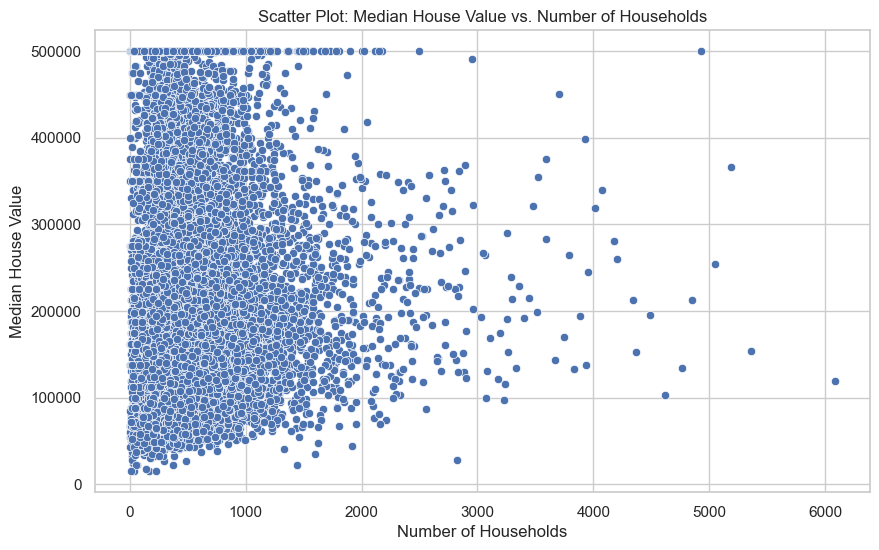

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Scatter plot: Median House Value vs. Median Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Scatter Plot: Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Scatter plot: Median House Value vs. Population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Scatter Plot: Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

# Scatter plot: Median House Value vs. Number of Households
plt.figure(figsize=(10, 6))
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Scatter Plot: Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()


## _4-Running three linear regressions_ 

In [5]:
from sklearn import linear_model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


model = linear_model.LinearRegression()


### Model 1: median house value vs. median income

In [6]:
X1 = data[['median_income']]
y1 = data['median_house_value']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)


LinearRegression()

### Model 2: median house value vs. population

In [7]:
X2 = data[['population']]
y2 = data['median_house_value']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

### Model 3: median house value vs. number of households

In [8]:
X3 = data[['households']]
y3 = data['median_house_value']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

## _5-Table_
### Intercept, Slope ,Mean Squared Error - the loss and Mean Absolute Error 

In [9]:
summary_table = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'Intercept': [model1.intercept_, model2.intercept_, model3.intercept_],
    'Slope': [model1.coef_[0], model2.coef_[0], model3.coef_[0]],
    'Mean Squared Error': [
        mean_squared_error(y1_test, model1.predict(X1_test)),
        mean_squared_error(y2_test, model2.predict(X2_test)),
        mean_squared_error(y3_test, model3.predict(X3_test))
    ],
    'Mean Absolute Error': [
        mean_absolute_error(y1_test, model1.predict(X1_test)),
        mean_absolute_error(y2_test, model2.predict(X2_test)),
        mean_absolute_error(y3_test, model3.predict(X3_test))
    ]
})

print(summary_table)

     Model      Intercept         Slope  Mean Squared Error   
0  Model 1   44459.729169  41933.849394        7.091158e+09  \
1  Model 2  210970.696345     -2.647127        1.310287e+10   
2  Model 3  197526.369197     19.337155        1.303558e+10   

   Mean Absolute Error  
0         62990.865301  
1         90588.877725  
2         90218.258138  


## _Table Summary_

| Models    | Intercept | Slope | MSE | MAE |
| -------- | ------- |------- |------- |------- |
|Model-1  | 44459.729169      |  41933.849394   | 7.091158e+09 |62990.865301    |
|Model-2 |  210970.696345   |  2.647127   |   1.310287e+10   |90588.877725   |
|Model-3    |  197526.369197    |  19.337155| 1.303558e+10    |90218.258138   |

## (6) _Resulting line_

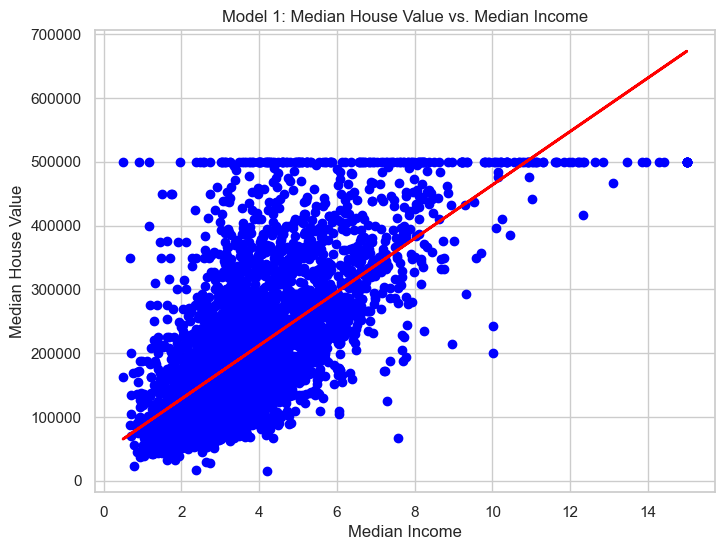

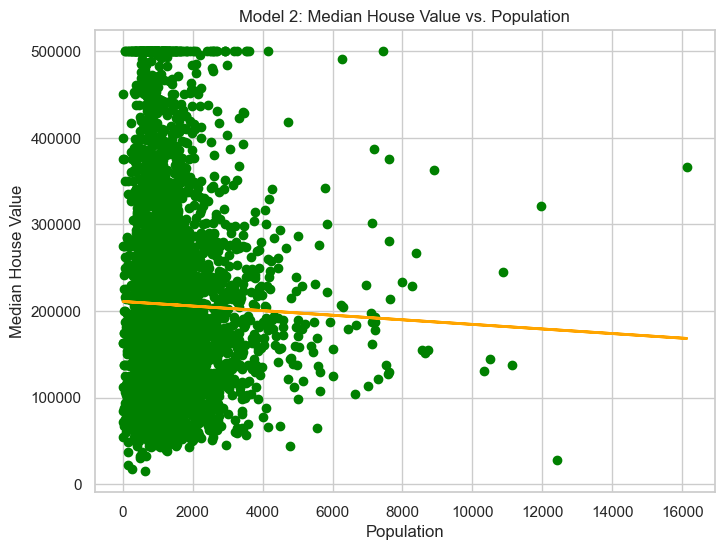

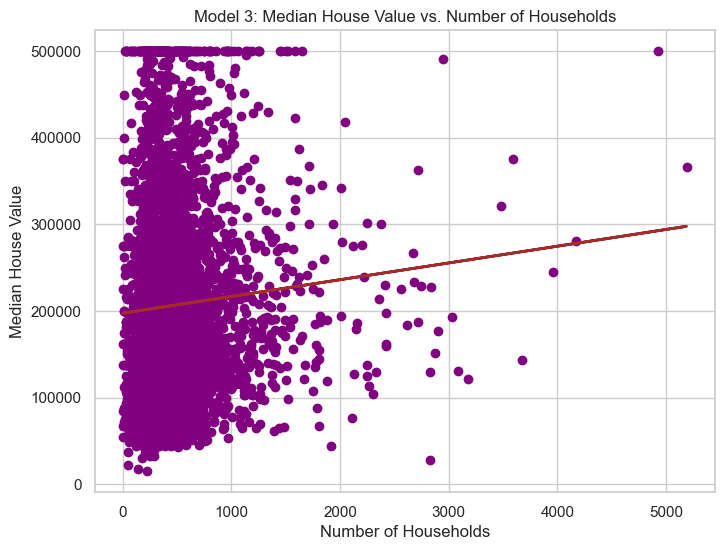

In [10]:
# Plotting Model 1
plt.figure(figsize=(8, 6))
plt.scatter(X1_test, y1_test, color='blue')
plt.plot(X1_test, model1.predict(X1_test), color='red', linewidth=2)
plt.title('Model 1: Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Plotting Model 2
plt.figure(figsize=(8, 6))
plt.scatter(X2_test, y2_test, color='green')
plt.plot(X2_test, model2.predict(X2_test), color='orange', linewidth=2)
plt.title('Model 2: Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

# Plotting Model 3
plt.figure(figsize=(8, 6))
plt.scatter(X3_test, y3_test, color='purple')
plt.plot(X3_test, model3.predict(X3_test), color='brown', linewidth=2)
plt.title('Model 3: Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()


# (7) Insights

Model 1:

The intercept provides a baseline value for median house value when other factors are zero, and the positive slope indicates that median house value increases with the corresponding variable. The lower mean squared error and mean absolute error point to superior model performance, suggesting that Model 1 accurately fits the data.

Model 2:

With a relatively high intercept, Model 2 has a negative slope, implying a decrease in median house value as the corresponding variable increases. However, the elevated mean squared error and mean absolute error indicate suboptimal model fit, suggesting that this model may not be the most suitable for the data.

Model 3:

Similar to Model 2, Model 3 features a relatively high intercept, and its positive slope suggests an increase in median house value with the corresponding variable. The moderately high mean squared error and mean absolute error imply a degree of prediction error, indicating that Model 3 may not offer the same level of accuracy as Model 1.